In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
number_mice = len(mouse_study["Mouse ID"].unique())
number_mice

249

In [6]:
items_counts = mouse_study['Mouse ID'].value_counts(sort=False)
top = items_counts.loc[[items_counts.idxmax()]]
value, count = top.index[0], top.iat[0]
top

Mouse ID
g989    13
Name: count, dtype: int64

In [7]:
dup_mouse = mouse_study.loc[mouse_study["Mouse ID"]=="g989"]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
clean_mice = mouse_study.loc[mouse_study["Mouse ID"]!="g989",:]
clean_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
clean_mice_num = len(clean_mice["Mouse ID"].unique())
clean_mice_num

248

In [10]:
by_regimen = clean_mice.groupby(["Drug Regimen"])
regimen_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].mean())
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
regimen_stats

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [11]:
second_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].median())
second_stats = second_stats.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
second_stats

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [12]:
third_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].var())
third_stats = third_stats.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
third_stats

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [13]:
fourth_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].std())
fourth_stats = fourth_stats.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
fourth_stats

,Tumor Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [14]:
fifth_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].sem())
fifth_stats = fifth_stats.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})
fifth_stats

,Tumor Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [15]:
summary_one = regimen_stats.merge(second_stats, on=["Drug Regimen"]).join(third_stats,
                                                               on="Drug Regimen")
summary_one

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.320930,50.446266,43.852013
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [16]:
summary_stats = summary_one.merge(fourth_stats, on=["Drug Regimen"]).join(fifth_stats, on="Drug Regimen")
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# summary_aggmethod = clean_mice.groupby(["Drug Regimen"])
# summary_method = pd.DataFrame(summary_aggmethod[["Tumor Volume (mm3)"]].mean()) &
#     (summary_aggmethod[["Tumor Volume (mm3)"]].median()) &
#     (summary_aggmethod[["Tumor Volume (mm3)"]].var()) &
#     (summary_aggmethod[["Tumor Volume (mm3)"]].std()) &
#     (summary_aggmethod[["Tumor Volume (mm3)"]].sem())
# summary_method = fifth_stats.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

In [17]:
regimen_timepoints = pd.DataFrame(by_regimen[["Timepoint"]].count())
regimen_timepoints

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


Bar and Pie Charts

In [18]:
import matplotlib.pyplot as plt
import numpy as np

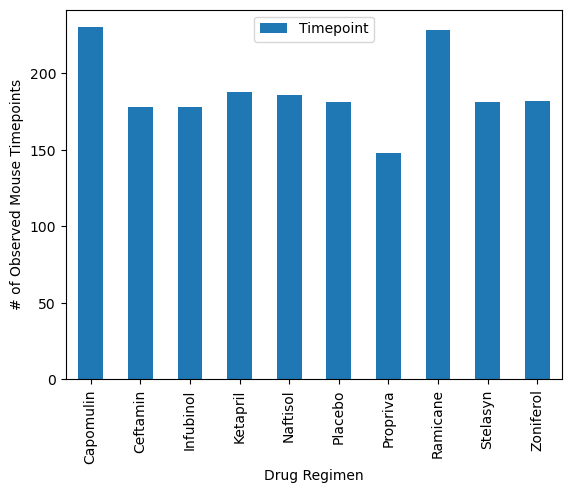

<Figure size 640x480 with 0 Axes>

In [19]:
regimen_timepoints.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

In [20]:
# x_axis = regimen_timepoints.index.values()
# y_axis = regimen_timepoints.values()

# plt.bar(x_axis, y_axis, color="blue", alpha=0.75, align="center")

# plt.xlabel = "Drug Regimen"
# plt.ylabel = "# of Observed Mouse Timepoints"

In [21]:
mice_gender = clean_mice.groupby(['Sex'])
mice_gender
mouse_individual = mice_gender
mouse_gender = pd.DataFrame(mice_gender[["Mouse ID"]].count())
mouse_gender

,Mouse ID
Sex,
Female,922
Male,958


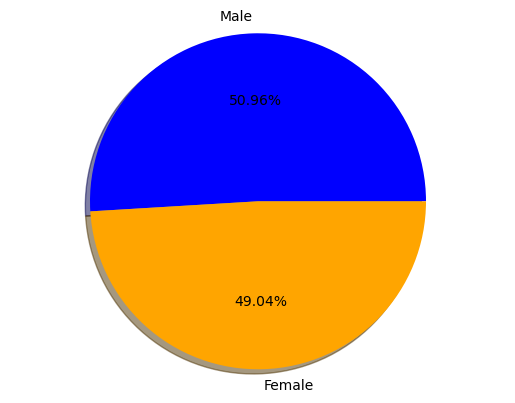

In [22]:
sex = ['Male', 'Female']
counts = ['958', '922']
colors = ['blue', 'orange']
explode = [0, 0]

# plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
#         autopct="%0.2f%%", shadow=True, startangle=90)

plt.pie(counts, explode=explode, labels=sex, colors=colors,
       autopct="%0.2f%%", shadow=True, startangle = 0)
plt.axis("equal")
plt.show()

In [23]:
# sex = ['Male', 'Female']

# mouse_count = mouse_gender.loc[mouse_gender['Mouse ID'],:]

# mouse_pie = mouse_count.plot(kind='pie', y='Mouse ID', labels=mouse_gender, autopct="%0.2f%%", shadow=True, startangle = 0)

# plt.axis('equal')

# plt.show()

Quartiles, Outliers, and Boxplots

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [25]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [26]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [27]:
quartile_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
quartile_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [28]:
quartile_clean = quartile_study.loc[quartile_study["Mouse ID"]!="g989",:]
quartile_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [29]:
mice_name = quartile_clean.groupby(["Mouse ID"])
mice_name.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [30]:
# poverty_sorted_df = census_2019_df.sort_values(["Poverty Rate (%)", 
#                                              "Average Per Capita Income by County"],
#                                            ascending=False)

# # Reset Index
# poverty_sorted_df = poverty_sorted_df.reset_index(drop=True)
# poverty_sorted_df.head()
times_sorted = quartile_clean.sort_values(["Timepoint"], ascending=False)

times_sorted = times_sorted.reset_index(drop=True)
times_sorted.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b879,45,72.555239,2,Stelasyn,Female,4,26
1,s508,45,30.276232,0,Ramicane,Male,1,17
2,y793,45,31.896238,2,Capomulin,Male,17,17
3,c766,45,69.823146,4,Placebo,Female,13,26
4,z578,45,30.638696,0,Ramicane,Male,11,16


In [31]:
capo_tumors = times_sorted.loc[times_sorted["Drug Regimen"]=="Capomulin",:]
capo_tumors

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
2,y793,45,31.896238,2,Capomulin,Male,17,17
5,m957,45,33.329098,1,Capomulin,Female,3,19
22,l897,45,38.846876,1,Capomulin,Male,17,19
26,v923,45,40.658124,2,Capomulin,Female,19,21
36,b128,45,38.982878,2,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1810,b742,0,45.000000,0,Capomulin,Male,7,21
1811,s185,0,45.000000,0,Capomulin,Female,3,17
1812,r554,0,45.000000,0,Capomulin,Female,8,17
1813,j246,0,45.000000,0,Capomulin,Female,21,21


In [60]:
capo_tumorvol = capo_tumors.set_index('Mouse ID')
highest_capo = capo_tumorvol.loc[capo_tumorvol['Timepoint']==45,:]
highest_capo    

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
y793,45,31.896238,2,Capomulin,Male,17,17
m957,45,33.329098,1,Capomulin,Female,3,19
l897,45,38.846876,1,Capomulin,Male,17,19
v923,45,40.658124,2,Capomulin,Female,19,21
b128,45,38.982878,2,Capomulin,Female,9,22
t565,45,34.455298,0,Capomulin,Female,20,17
l509,45,41.483008,3,Capomulin,Male,17,21
g288,45,37.074024,1,Capomulin,Male,3,19
r554,45,32.377357,3,Capomulin,Female,8,17


In [61]:
rami_tumors = times_sorted.loc[times_sorted["Drug Regimen"]=="Ramicane",:]
rami_tumors

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,s508,45,30.276232,0,Ramicane,Male,1,17
4,z578,45,30.638696,0,Ramicane,Male,11,16
6,e662,45,40.659006,2,Ramicane,Male,8,24
13,m546,45,30.564625,1,Ramicane,Male,18,16
19,k403,45,22.050126,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1694,a411,0,45.000000,0,Ramicane,Male,3,22
1725,j913,0,45.000000,0,Ramicane,Female,4,17
1727,q610,0,45.000000,0,Ramicane,Female,18,21
1728,c458,0,45.000000,0,Ramicane,Female,23,20


In [62]:
rami_tumorvol = rami_tumors.set_index('Mouse ID')
highest_rami = rami_tumorvol.loc[rami_tumorvol['Timepoint']==45,:]
highest_rami 

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
s508,45,30.276232,0,Ramicane,Male,1,17
z578,45,30.638696,0,Ramicane,Male,11,16
e662,45,40.659006,2,Ramicane,Male,8,24
m546,45,30.564625,1,Ramicane,Male,18,16
k403,45,22.050126,1,Ramicane,Male,21,16
c758,45,33.397653,1,Ramicane,Male,9,17
n364,45,31.095335,1,Ramicane,Male,4,17
a411,45,38.407618,1,Ramicane,Male,3,22
q597,45,45.220869,2,Ramicane,Male,20,25


In [63]:
infu_tumors = times_sorted.loc[times_sorted["Drug Regimen"]=="Infubinol",:]
infu_tumors

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,e476,45,62.435404,1,Infubinol,Male,23,26
9,a203,45,67.973419,2,Infubinol,Female,20,23
11,f345,45,60.918767,1,Infubinol,Male,23,26
32,a685,45,66.083066,3,Infubinol,Male,8,30
51,y163,45,67.685569,3,Infubinol,Female,17,27
...,...,...,...,...,...,...,...,...
1818,s121,0,45.000000,0,Infubinol,Male,23,26
1819,n671,0,45.000000,0,Infubinol,Male,18,25
1850,m756,0,45.000000,0,Infubinol,Male,19,30
1852,o813,0,45.000000,0,Infubinol,Male,24,28


In [64]:
infu_tumorvol = infu_tumors.set_index('Mouse ID')
highest_infu = infu_tumorvol.loc[infu_tumorvol['Timepoint']==45,:]
highest_infu 

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
e476,45,62.435404,1,Infubinol,Male,23,26
a203,45,67.973419,2,Infubinol,Female,20,23
f345,45,60.918767,1,Infubinol,Male,23,26
a685,45,66.083066,3,Infubinol,Male,8,30
y163,45,67.685569,3,Infubinol,Female,17,27
c139,45,72.226731,2,Infubinol,Male,11,28
z581,45,62.754451,3,Infubinol,Female,24,25
a251,45,65.525743,1,Infubinol,Female,21,25
k483,45,66.196912,3,Infubinol,Female,20,30


In [65]:
ceft_tumors = times_sorted.loc[times_sorted["Drug Regimen"]=="Ceftamin",:]
ceft_tumors

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
15,l471,45,67.748662,1,Ceftamin,Female,7,28
37,l661,45,59.851956,3,Ceftamin,Male,18,26
38,y865,45,64.729837,3,Ceftamin,Male,23,26
39,y769,45,68.594745,4,Ceftamin,Female,6,27
44,j296,45,61.849023,3,Ceftamin,Female,24,30
...,...,...,...,...,...,...,...,...
1864,l490,0,45.000000,0,Ceftamin,Male,24,26
1865,f436,0,45.000000,0,Ceftamin,Female,3,25
1866,l733,0,45.000000,0,Ceftamin,Female,4,30
1867,l558,0,45.000000,0,Ceftamin,Female,13,30


In [66]:
ceft_tumorvol = ceft_tumors.set_index('Mouse ID')
highest_ceft = ceft_tumorvol.loc[ceft_tumorvol['Timepoint']==45,:]
highest_ceft 

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
l471,45,67.748662,1,Ceftamin,Female,7,28
l661,45,59.851956,3,Ceftamin,Male,18,26
y865,45,64.729837,3,Ceftamin,Male,23,26
y769,45,68.594745,4,Ceftamin,Female,6,27
j296,45,61.849023,3,Ceftamin,Female,24,30
w151,45,67.527482,3,Ceftamin,Male,24,25
l733,45,64.299830,1,Ceftamin,Female,4,30
o287,45,59.741901,4,Ceftamin,Male,2,28
p438,45,61.433892,1,Ceftamin,Female,11,26


In [43]:
four_regimens = {
    
}

NameError: name 'frames' is not defined

In [96]:
# by_regimen = clean_mice.groupby(["Drug Regimen"])
# regimen_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].mean())
# regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
# regimen_stats


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
a401    45
a411    45
a444    45
a457    10
a492    45
a520    45
a577    30
a644    45
a685    45
a699    45
a788    30
a818    45
a897    45
a963    45
b128    45
b313    25
b447     0
b487    25
b559    45
b742    45
Name: Timepoint, dtype: int64

In [ ]:
# third_stats = pd.DataFrame(by_regimen[["Tumor Volume (mm3)"]].var())
# third_stats = third_stats.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
# third_stats


In [ ]:
# If the data is in a dataframe, we use pandas to give quartile calculations
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# iqr_1_5 = iqr * 1.5

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The interquartile * 1.5 range of temperatures is: {iqr_1_5}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - iqr_1_5
# upper_bound = upperq + iqr_1_5
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")